# 3-way overlap
* Measuring the overlap between Jacobian and brain regions
* Measuring the overlap between Jacobian and clusters
* Measuring overlap between top brain regions and clusters

In [1]:
# Importing libraries
%run nifti_tools.ipynb
%run Overlap_functions.ipynb
%matplotlib inline

**Choosing top hits of DICE coefficient (anatomy and Jacobian) to see how much of Jacobian they cover,
and selecting a threshold for it.**

In [2]:
# Loading the comprehensive overlap dataframe
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

Last index included to reach an overlap of 0.51 with Jacobian is 15.


**Checking overlap of Jacobian and clusters**

In [3]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters,
clusters ranging from 1 to 250.
mode = DICE
'''

# Range of number of clusters
n_max = 250
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_binary_200.nii'

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = Overlap_jac_clusters(jac_file, cluster_file)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_DICE_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_DICE_df['cluster_ID'] = range(n_max)
output_DICE_df.set_index('cluster_ID', inplace = True)

In [4]:
output_DICE_df.head()

,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,...,241_clusters,242_clusters,243_clusters,244_clusters,245_clusters,246_clusters,247_clusters,248_clusters,249_clusters,250_clusters
cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,0.018385,0.003322,0.001602,0.001258,0.001259,0.063407,0.003329,0.004994,0.001088,0.002525,...,0.000000,0.000915,0.000000,0.000000,0.000000,0.001831,0.000000,0.001093,0.003902,0.007357
1,0.000000,0.041810,0.008254,0.049394,0.049910,0.032026,0.001183,0.002655,0.047604,0.001077,...,0.000000,0.001096,0.000000,0.001219,0.000717,0.001092,0.006676,0.005830,0.000000,0.000000
2,0.000000,0.000000,0.057803,0.052525,0.055256,0.001177,0.025777,0.047634,0.004992,0.058478,...,0.002056,0.000000,0.003735,0.000000,0.043400,0.008187,0.000308,0.000000,0.014824,0.000000
3,0.000000,0.000000,0.000000,0.005967,0.032423,0.033331,0.018419,0.023950,0.003053,0.025400,...,0.000000,0.002053,0.000317,0.045304,0.121197,0.006526,0.001242,0.001515,0.000000,0.003985
4,0.000000,0.000000,0.000000,0.000000,0.004316,0.004538,0.033026,0.001088,0.033804,0.036832,...,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.003162,0.003989,0.025253,0.000000


In [5]:
# Showing top hits of n clusters
n_clusters = 230
output_DICE_df[str(n_clusters)+'_clusters'].iloc[:n_clusters].sort_values(ascending=False)

cluster_ID
229    0.131687
192    0.063332
27     0.050741
49     0.031395
173    0.025772
         ...   
56     0.000000
57     0.000000
58     0.000000
130    0.000000
115    0.000000
Name: 230_clusters, Length: 230, dtype: float64

Maximum ratio is 0.1519681116093672 for 230 clusters.



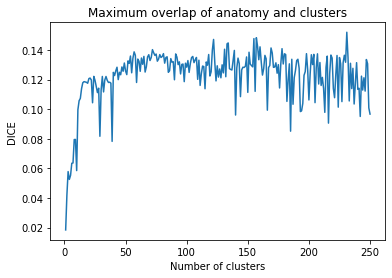

In [9]:
'''
Plotting the highest value in each experiment.
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 250

for i in range(n_clusters):
    max_ratio = output_DICE_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))))

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("DICE")
plt.title("Maximum overlap of anatomy and clusters")

# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

In [6]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters,
clusters ranging from 1 to 250.
mode = Jac
'''

# Range of number of clusters
n_max = 250
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_binary_200.nii'

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = Overlap_jac_clusters(jac_file, cluster_file, mode = 'jac')
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_jac_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_jac_df['cluster_ID'] = range(n_max)
output_jac_df.set_index('cluster_ID', inplace = True)

In [11]:
output_jac_df.head()

,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,...,241_clusters,242_clusters,243_clusters,244_clusters,245_clusters,246_clusters,247_clusters,248_clusters,249_clusters,250_clusters
cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.113606,0.052949,0.040214,0.040214,0.462466,0.019102,0.028485,0.031166,0.003016,...,0.000000,0.001005,0.000000,0.000000,0.000000,0.002011,0.000000,0.018767,0.004357,0.009718
1,0.0,0.886394,0.067024,0.517761,0.363271,0.184987,0.036193,0.014075,0.302614,0.012064,...,0.000000,0.018767,0.000000,0.001340,0.003351,0.018767,0.008378,0.006367,0.000000,0.000000
2,0.0,0.000000,0.880027,0.398123,0.378016,0.035858,0.084786,0.302949,0.028485,0.403150,...,0.002346,0.000000,0.004021,0.000000,0.048257,0.009048,0.000335,0.000000,0.016756,0.000000
3,0.0,0.000000,0.000000,0.043901,0.190684,0.202078,0.090483,0.078753,0.003686,0.082440,...,0.000000,0.002346,0.000335,0.050268,0.162869,0.007373,0.001340,0.001676,0.000000,0.004357
4,0.0,0.000000,0.000000,0.000000,0.027815,0.029491,0.191019,0.031166,0.085791,0.093834,...,0.000000,0.000000,0.000000,0.018767,0.000000,0.000000,0.003351,0.004357,0.030161,0.000000


In [7]:
# Showing top hits of n clusters
n_clusters = 230
output_jac_df[str(n_clusters)+'_clusters'].iloc[:n_clusters].sort_values(ascending=False)

cluster_ID
229    0.182306
192    0.071716
27     0.059651
49     0.036193
173    0.032172
         ...   
100    0.000000
99     0.000000
95     0.000000
91     0.000000
115    0.000000
Name: 230_clusters, Length: 230, dtype: float64

Maximum ratio is 1.0 for 0 clusters.



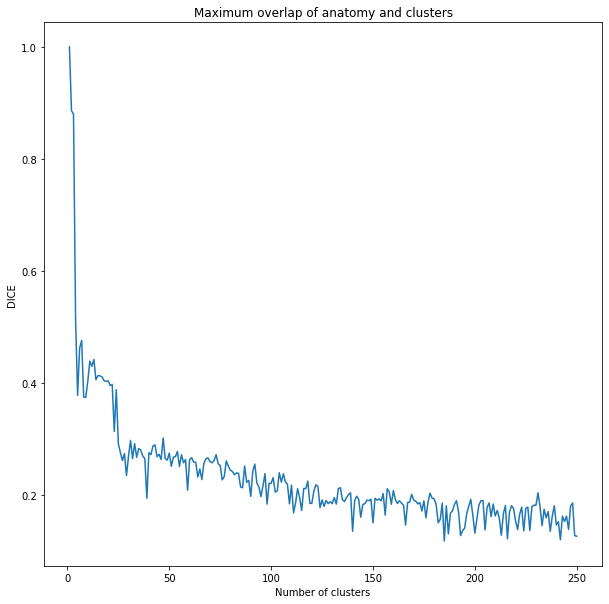

In [10]:
'''
Plotting the highest value in each experiment
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 250

for i in range(n_clusters):
    max_ratio = output_jac_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))))

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("DICE")
plt.title("Maximum overlap of anatomy and clusters")

# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

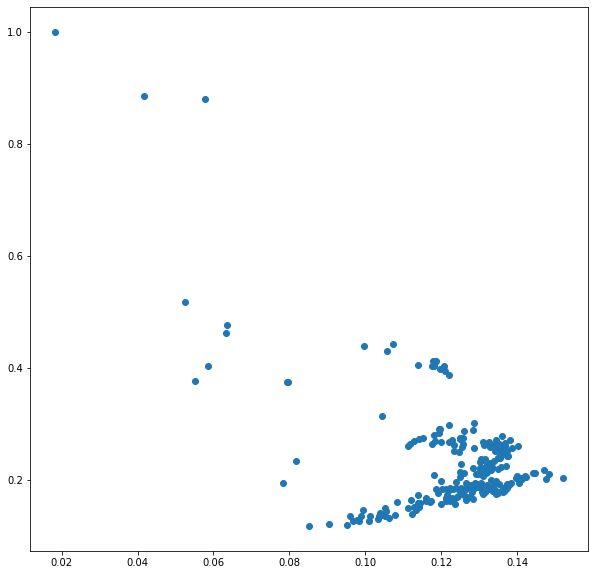

In [12]:
'''
Scatter plot: top hit of clusters and Jacobian based on DICE
DICE coefficient vs Jac coefficient
'''

# Maximum number of clusters
n_clusters = 250

# x is the DICE coefficients
DICE_list = []

for i in range(n_clusters):
    max_ratio = output_DICE_df.iloc[:,i].max()
    DICE_list.append(max_ratio)

# y is the Jac coefficient
jac_list = []

for i in range(n_clusters):
    max_ratio = output_jac_df.iloc[:,i].max()
    jac_list.append(max_ratio)

plt.scatter(DICE_list, jac_list)
plt.show()

In [13]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters,
clusters ranging from 1 to 250.
mode = cluster
'''

# Range of number of clusters
n_max = 250
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_binary_200.nii'

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = Overlap_jac_clusters(jac_file, cluster_file, mode = 'cluster')
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_cluster_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_cluster_df['cluster_ID'] = range(n_max)
output_cluster_df.set_index('cluster_ID', inplace = True)

Maximum ratio is 0.6618075801749271 for 248 clusters.



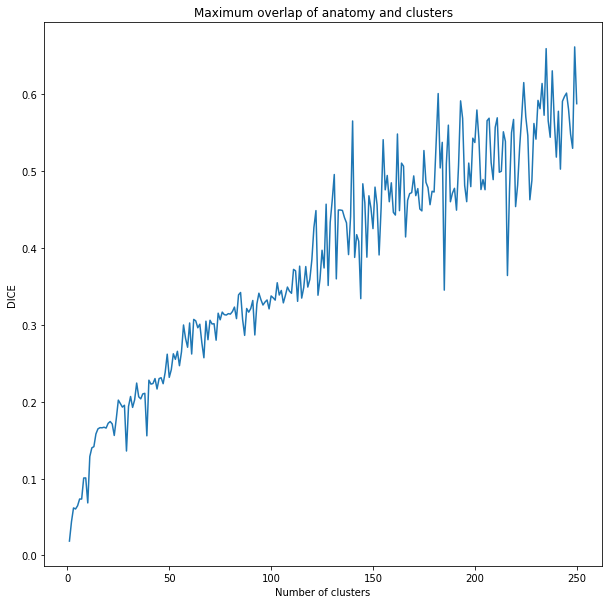

In [14]:
'''
Plotting the highest value in each experiment
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 250

for i in range(n_clusters):
    max_ratio = output_cluster_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))))

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("DICE")
plt.title("Maximum overlap of anatomy and clusters")

# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

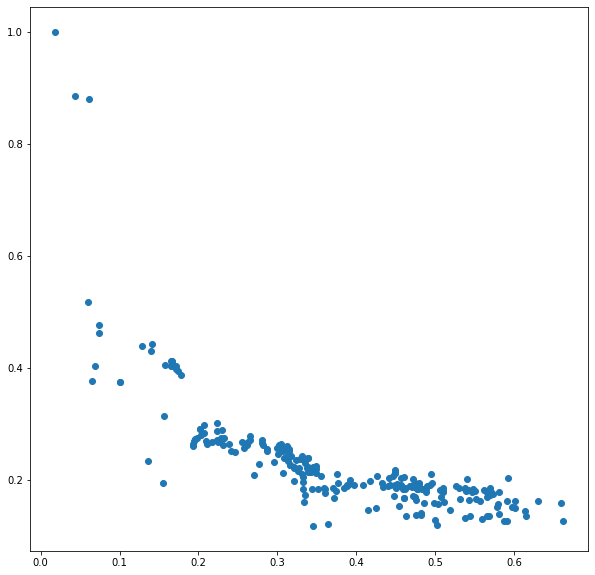

In [18]:
'''
Scatter plot: top hit of clusters and Jacobian based on DICE
DICE coefficient vs Jac coefficient
'''

# Maximum number of clusters
n_clusters = 250

# x is the DICE coefficients
cluster_list = []

for i in range(n_clusters):
    max_ratio = output_cluster_df.iloc[:,i].max()
    cluster_list.append(max_ratio)

# y is the Jac coefficient
jac_list = []

for i in range(n_clusters):
    max_ratio = output_jac_df.iloc[:,i].max()
    jac_list.append(max_ratio)

plt.scatter(cluster_list, jac_list)
plt.show()